# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
cities

['gorontalo',
 'atafu village',
 'bredasdorp',
 'hawaiian paradise park',
 'dunedin',
 'albany',
 'remire-montjoly',
 'grytviken',
 'taco pozo',
 'tiksi',
 'port-aux-francais',
 'nguigmi',
 'adamstown',
 'waitangi',
 'riberalta',
 'yellowknife',
 'ar rutbah',
 'puerto ayora',
 'olonkinbyen',
 'port elizabeth',
 'minas de marcona',
 'ilulissat',
 'itoman',
 'ushuaia',
 'sosnogorsk',
 'whitehorse',
 'zhanaozen',
 'timimoun',
 'new norfolk',
 'valdosta',
 'tura',
 'cabo san lucas',
 'bilibino',
 'borba',
 'nemuro',
 'palmeiras de goias',
 'edinburgh of the seven seas',
 'wailua homesteads',
 'hermanus',
 'thompson',
 'bethel',
 'isafjordur',
 'coquimbo',
 'belen',
 'birao',
 'codrington',
 'invercargill',
 'bairnsdale',
 'avarua',
 'tsiombe',
 'yuzhno-kurilsk',
 'saipan',
 'upata',
 'kidal',
 'sumbe',
 'ploudalmezeau',
 'norderney',
 'mabaruma',
 'jijiga',
 'kone',
 'alotau',
 'udachny',
 'chachapoyas',
 'ceeldheer',
 'ulanhot',
 'zhenlai',
 "stroitel'",
 'port mathurin',
 'kuala terengga

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gorontalo
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | remire-montjoly
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | taco pozo
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | nguigmi
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | riberalta
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ar rutbah
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | minas de marcona
Processing Record 22 of Set 

Processing Record 39 of Set 4 | aasiaat
Processing Record 40 of Set 4 | lubang
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | 'izbat al burj
City not found. Skipping...
Processing Record 43 of Set 4 | vorgashor
Processing Record 44 of Set 4 | new plymouth
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | chibougamau
Processing Record 47 of Set 4 | as sulayyil
Processing Record 48 of Set 4 | talcahuano
Processing Record 49 of Set 4 | kataragama
City not found. Skipping...
Processing Record 0 of Set 5 | constitucion
Processing Record 1 of Set 5 | arno
Processing Record 2 of Set 5 | villa ojo de agua
Processing Record 3 of Set 5 | sur
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | pont rouge
Processing Record 6 of Set 5 | nelson bay
Processing Record 7 of Set 5 | swift current
Processing Record 8 of Set 5 | oodweyne
Processing Record 9 of Set 5 | nichinan
Processing Record 10 of Set 5 | bodaybo
Processing Reco

Processing Record 30 of Set 8 | hotan
Processing Record 31 of Set 8 | uturoa
Processing Record 32 of Set 8 | gadzhiyevo
Processing Record 33 of Set 8 | cole harbour
Processing Record 34 of Set 8 | koryazhma
Processing Record 35 of Set 8 | canico
Processing Record 36 of Set 8 | brookings
Processing Record 37 of Set 8 | plastun
Processing Record 38 of Set 8 | cable beach
City not found. Skipping...
Processing Record 39 of Set 8 | mokhsogollokh
Processing Record 40 of Set 8 | tuy hoa
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | preobrazheniye
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | egyek
Processing Record 45 of Set 8 | liman
Processing Record 46 of Set 8 | briar
Processing Record 47 of Set 8 | alesund
Processing Record 48 of Set 8 | woolgoolga
Processing Record 49 of Set 8 | ambalangoda
Processing Record 0 of Set 9 | rio grande
Processing Record 1 of Set 9 | arraial do cabo
Processing Record 2 of Set 9 | nanma
Processing Record 3 o

Processing Record 24 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 25 of Set 12 | ngala
Processing Record 26 of Set 12 | ulladulla
Processing Record 27 of Set 12 | sakakah
Processing Record 28 of Set 12 | birjand
Processing Record 29 of Set 12 | timmins
Processing Record 30 of Set 12 | arawa
Processing Record 31 of Set 12 | cadale
Processing Record 32 of Set 12 | andergrove
Processing Record 33 of Set 12 | qorovulbozor
Processing Record 34 of Set 12 | burutu
Processing Record 35 of Set 12 | buedu
Processing Record 36 of Set 12 | manicore
Processing Record 37 of Set 12 | magistral'nyy
Processing Record 38 of Set 12 | jalai nur
Processing Record 39 of Set 12 | qala i naw
Processing Record 40 of Set 12 | soderhamn
Processing Record 41 of Set 12 | traunreut
Processing Record 42 of Set 12 | sacalaz
Processing Record 43 of Set 12 | mugia
Processing Record 44 of Set 12 | yaren
Processing Record 45 of Set 12 | chaihe
Processing Record 46 of Set 12 | bosaso
Processi

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gorontalo,0.5412,123.0595,25.97,85,99,0.79,ID,1699742086
1,atafu village,-8.5421,-172.5159,29.04,73,44,3.57,TK,1699741856
2,bredasdorp,-34.5322,20.0403,16.04,71,49,4.15,ZA,1699742009
3,hawaiian paradise park,19.5933,-154.9731,27.15,79,100,2.06,US,1699741984
4,dunedin,-45.8742,170.5036,17.82,64,62,0.45,NZ,1699741809


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gorontalo,0.5412,123.0595,25.97,85,99,0.79,ID,1699742086
1,atafu village,-8.5421,-172.5159,29.04,73,44,3.57,TK,1699741856
2,bredasdorp,-34.5322,20.0403,16.04,71,49,4.15,ZA,1699742009
3,hawaiian paradise park,19.5933,-154.9731,27.15,79,100,2.06,US,1699741984
4,dunedin,-45.8742,170.5036,17.82,64,62,0.45,NZ,1699741809


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

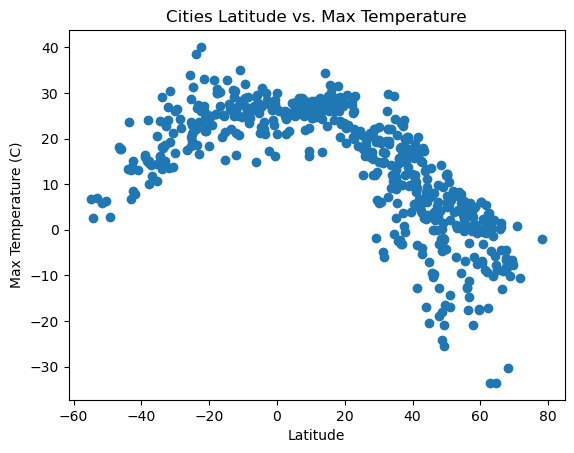

In [22]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df['Lat'].tolist()
temps = city_data_df['Max Temp'].tolist()
plt.scatter(lats, temps)

# Incorporate the other graph properties
plt.title('Cities Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

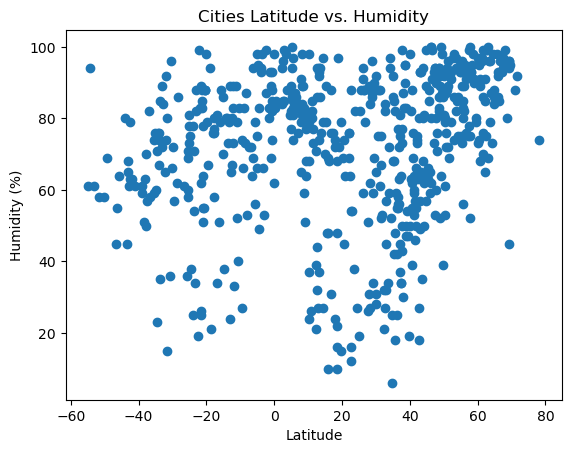

In [25]:
# Build the scatter plots for latitude vs. humidity
lats = city_data_df['Lat'].tolist()
humidity = city_data_df['Humidity'].tolist()
plt.scatter(lats, humidity)

# Incorporate the other graph properties
plt.title('Cities Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

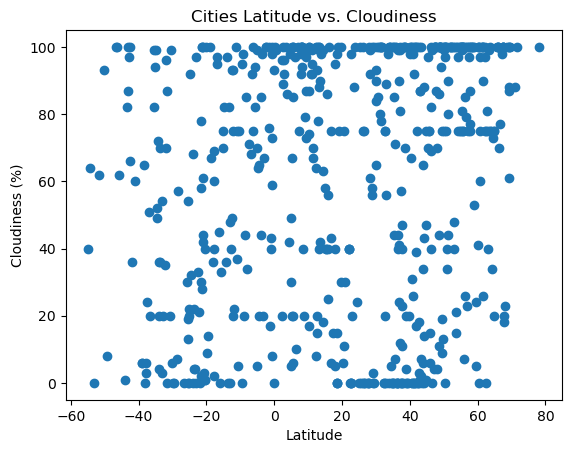

In [26]:
# Build the scatter plots for latitude vs. cloudiness
lats = city_data_df['Lat'].tolist()
cloudiness = city_data_df['Cloudiness'].tolist()
plt.scatter(lats, cloudiness)

# Incorporate the other graph properties
plt.title('Cities Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

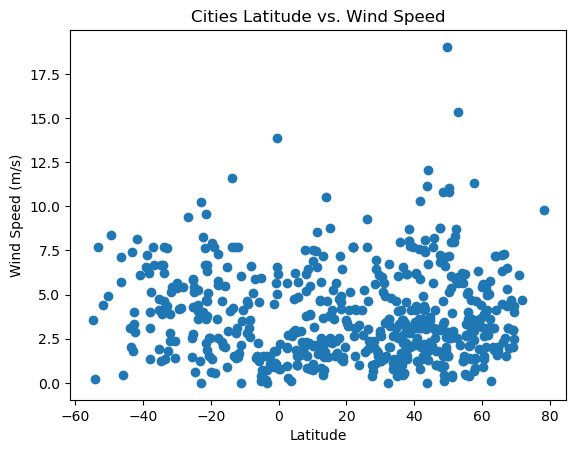

In [27]:
# Build the scatter plots for latitude vs. wind speed
lats = city_data_df['Lat'].tolist()
winds = city_data_df['Wind Speed'].tolist()
plt.scatter(lats, winds)

# Incorporate the other graph properties
plt.title('Cities Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation is: -0.03499978252930392


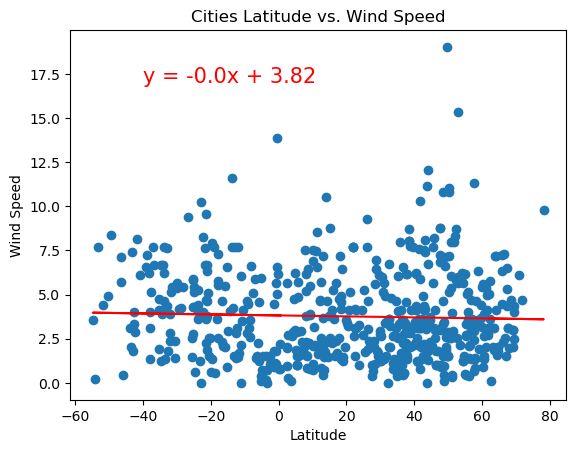

In [39]:
def linregress(y, string):

    from scipy.stats import linregress
    # define x and y values
    x_values = lats
    y_values = y

    # create chart
    plt.scatter(x_values,y_values)
    plt.title('Cities Latitude vs. ' + string)
    plt.xlabel('Latitude')
    plt.ylabel(string)

    # linear regression calculations
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept

    # graph the best fit line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-40,17),fontsize=15,color="red")

    print(f"The correlation is: {rvalue}")

linregress(winds, 'Wind Speed')

The r-value is: 0.001224984777098568


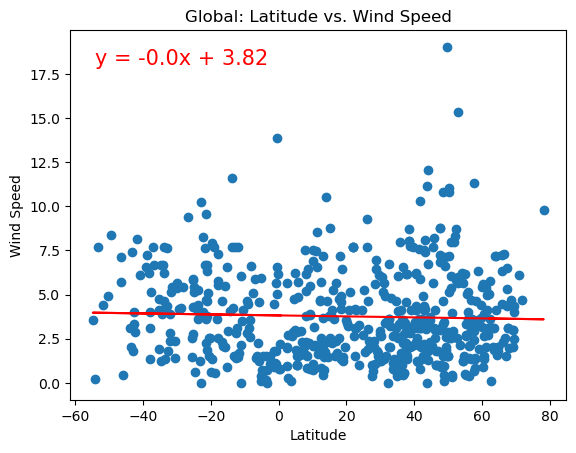

In [64]:
# Define a function to create Linear Regression plots

def linregress(x, y, xstring, ystring, title):

    from scipy.stats import linregress
    # define x and y values
    x_values = x
    y_values = y

    # create chart
    plt.scatter(x_values,y_values)
    plt.title(f'{title} {xstring} vs. {ystring}')
    plt.xlabel(xstring)
    plt.ylabel(ystring)

    # linear regression calculations
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept

    # graph the best fit line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=15, color="red")

    print(f"The r-value is: {rvalue**2}")

linregress(lats, winds, 'Latitude', 'Wind Speed', 'Global:')

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gorontalo,0.5412,123.0595,25.97,85,99,0.79,ID,1699742086
3,hawaiian paradise park,19.5933,-154.9731,27.15,79,100,2.06,US,1699741984
5,albany,42.6001,-73.9662,4.09,65,3,4.92,US,1699741874
6,remire-montjoly,4.9167,-52.2667,27.31,82,5,6.20,GF,1699742086
9,tiksi,71.6872,128.8694,-10.47,92,100,4.70,RU,1699742087


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,29.04,73,44,3.57,TK,1699741856
2,bredasdorp,-34.5322,20.0403,16.04,71,49,4.15,ZA,1699742009
4,dunedin,-45.8742,170.5036,17.82,64,62,0.45,NZ,1699741809
7,grytviken,-54.2811,-36.5092,2.48,94,64,0.22,GS,1699742087
8,taco pozo,-25.6167,-63.2833,33.94,36,30,1.47,AR,1699742087


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6841141520258391


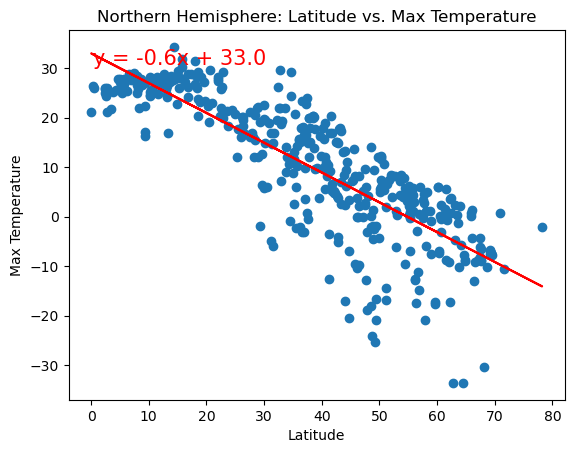

In [65]:
# Linear regression on Northern Hemisphere
nlats = northern_hemi_df['Lat'].tolist()
ntemps = northern_hemi_df['Max Temp'].tolist()
linregress(nlats, ntemps, 'Latitude', 'Max Temperature', 'Northern Hemisphere:')

The r-value is: 0.43519560362371196


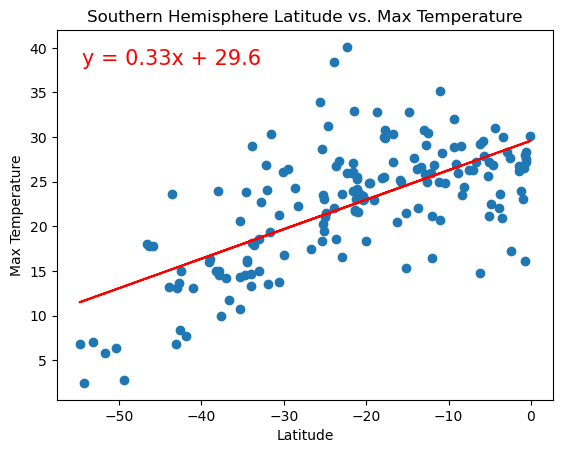

In [66]:
# Linear regression on Southern Hemisphere
slats = southern_hemi_df['Lat'].tolist()
stemps = southern_hemi_df['Max Temp'].tolist()
linregress(slats, stemps, 'Latitude', 'Max Temperature', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between latitude and max temperature for the selected cities is fairly strong. This is supported both visually and by the r2 values from the linear regression. The r2 value was 0.68 for the northern hemisphere and 0.44 for the southern hemisphere. These values indicate that temperature has a fairly strong correlation to distance from the equator. The relationship is further supported by the fact that the variables have a positive correlation in the southern hemisphere and negative correlation in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06150842555766869


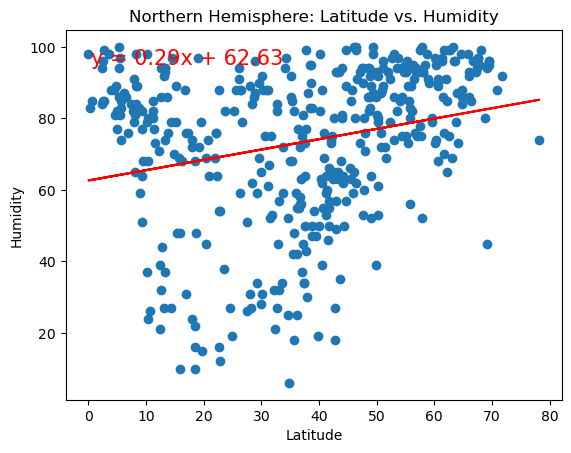

In [67]:
# Northern Hemisphere
nlats = northern_hemi_df['Lat'].tolist()
nhum = northern_hemi_df['Humidity'].tolist()
linregress(nlats, nhum, 'Latitude', 'Humidity', 'Northern Hemisphere:')

The r-value is: 0.05661737982859735


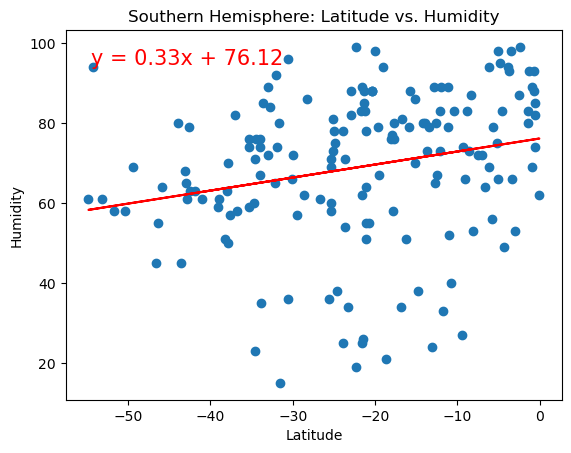

In [69]:
# Southern Hemisphere
slats = southern_hemi_df['Lat'].tolist()
shum = southern_hemi_df['Humidity'].tolist()
linregress(slats, shum, 'Latitude', 'Humidity', 'Southern Hemisphere:')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Unlike temperature, humidity appears to have very weak correlation to latitude. The r2 values are very low (less than 0.1) which corresponds to a visual check in that the data points are scattered throughout the graph. Whereas in the temperature graphs the data points are relatively clustered around the best fit line. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00949143331566905


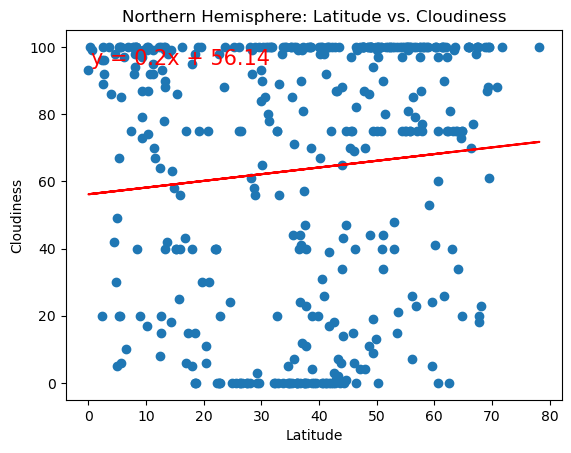

In [70]:
# Northern Hemisphere
nlats = northern_hemi_df['Lat'].tolist()
nclouds = northern_hemi_df['Cloudiness'].tolist()
linregress(nlats, nclouds, 'Latitude', 'Cloudiness', 'Northern Hemisphere:')

The r-value is: 0.015065404324144854


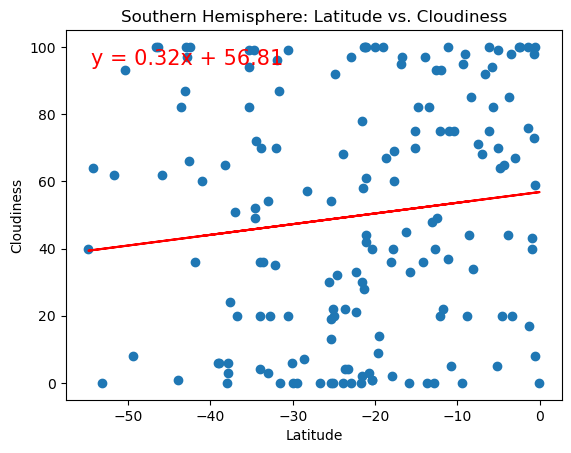

In [71]:
# Southern Hemisphere
slats = southern_hemi_df['Lat'].tolist()
sclouds = southern_hemi_df['Cloudiness'].tolist()
linregress(slats, sclouds, 'Latitude', 'Cloudiness', 'Southern Hemisphere:')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Similarly to humidity, cloudiness has little correlation to latitude. The r2 values are very low (less than 0.15) indicated very weak correlation and corresponds to a visual check in that the data points are scattered throughout the graph and not clustered around the best fit line. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012643655489752976


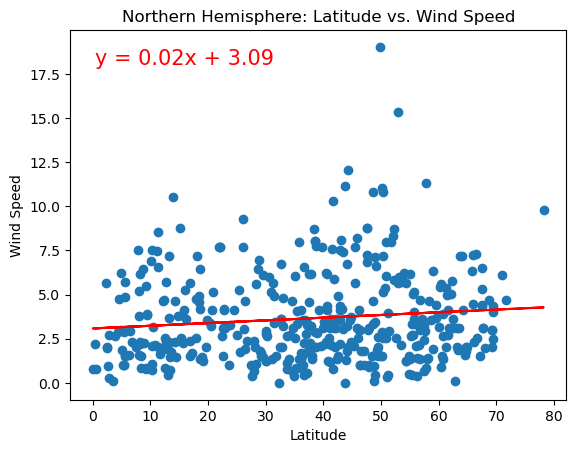

In [72]:
# Northern Hemisphere
nlats = northern_hemi_df['Lat'].tolist()
nwinds = northern_hemi_df['Wind Speed'].tolist()
linregress(nlats, nwinds, 'Latitude', 'Wind Speed', 'Northern Hemisphere:')

The r-value is: 0.0434025823412235


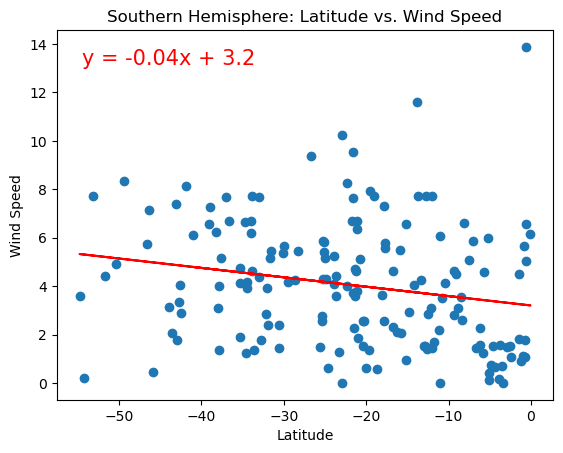

In [73]:
# Southern Hemisphere
slats = southern_hemi_df['Lat'].tolist()
swinds = southern_hemi_df['Wind Speed'].tolist()
linregress(slats, swinds, 'Latitude', 'Wind Speed', 'Southern Hemisphere:')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Again, the data demonstrates that wind speed has little correlation to latitude. The r2 values are very low (less than 0.15) indicated very weak correlation and corresponds to a visual check in that the data points are scattered throughout the graph and not clustered around the best fit line. 